# Model Selection

## Objective - To predict telco customer churn with the best model

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix , classification_report, f1_score,\
                            accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

SEED = 0

### Step 1: Load in the required data

In [2]:
df = pd.read_csv("churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

### Step 2: Data Pre-processing and Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Let us first clean our data
# 1) Look for any missing values
df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [6]:
# 2) Convert TotalCharges into numerical format
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Check for missing values again, since we choose 'coerce' to manage errors found
df['TotalCharges'].isna().sum()

11

In [7]:
# Let's drop the 11 rows with missing values
df = df.dropna()

In [8]:
# 3) Convert the SeniorCitizen column from int64 to object
df.SeniorCitizen= df['SeniorCitizen'].apply(lambda x : 'No' if x == 0 else 'Yes')
#df.SeniorCitizen= df['SeniorCitizen'].apply(num_to_word)

In [9]:
# 4) Since the CustomerID column is unique, we will drop the column
df = df.drop("customerID", axis=1)

### Let's analyze the data further and see how the independent variables are related to customer churn here!

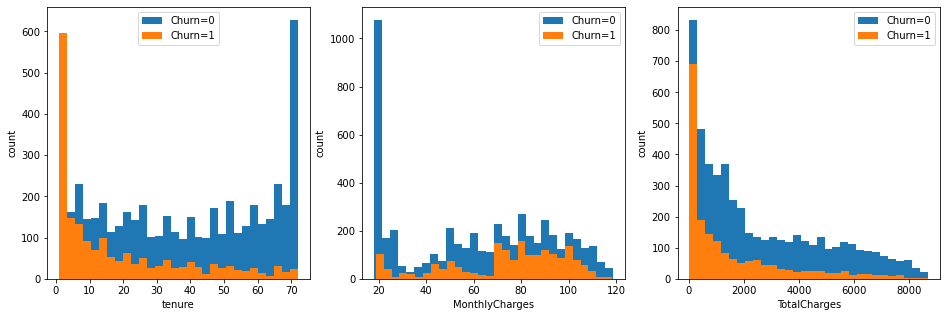

In [10]:
# Lets start by looking at the continuous variables

cvars = [i for i in df.columns if df[i].dtypes !='object']
fig,ax = plt.subplots(1,3,figsize=(16,5))

for i,x in enumerate(cvars):
    ax[i].hist(df[x][df.Churn=='No'],label='Churn=0',bins=30)
    ax[i].hist(df[x][df.Churn=='Yes'],label='Churn=1',bins=30)
    ax[i].set(xlabel=x,ylabel='count')
    ax[i].legend()

#### What do you observe from the above visualizations?

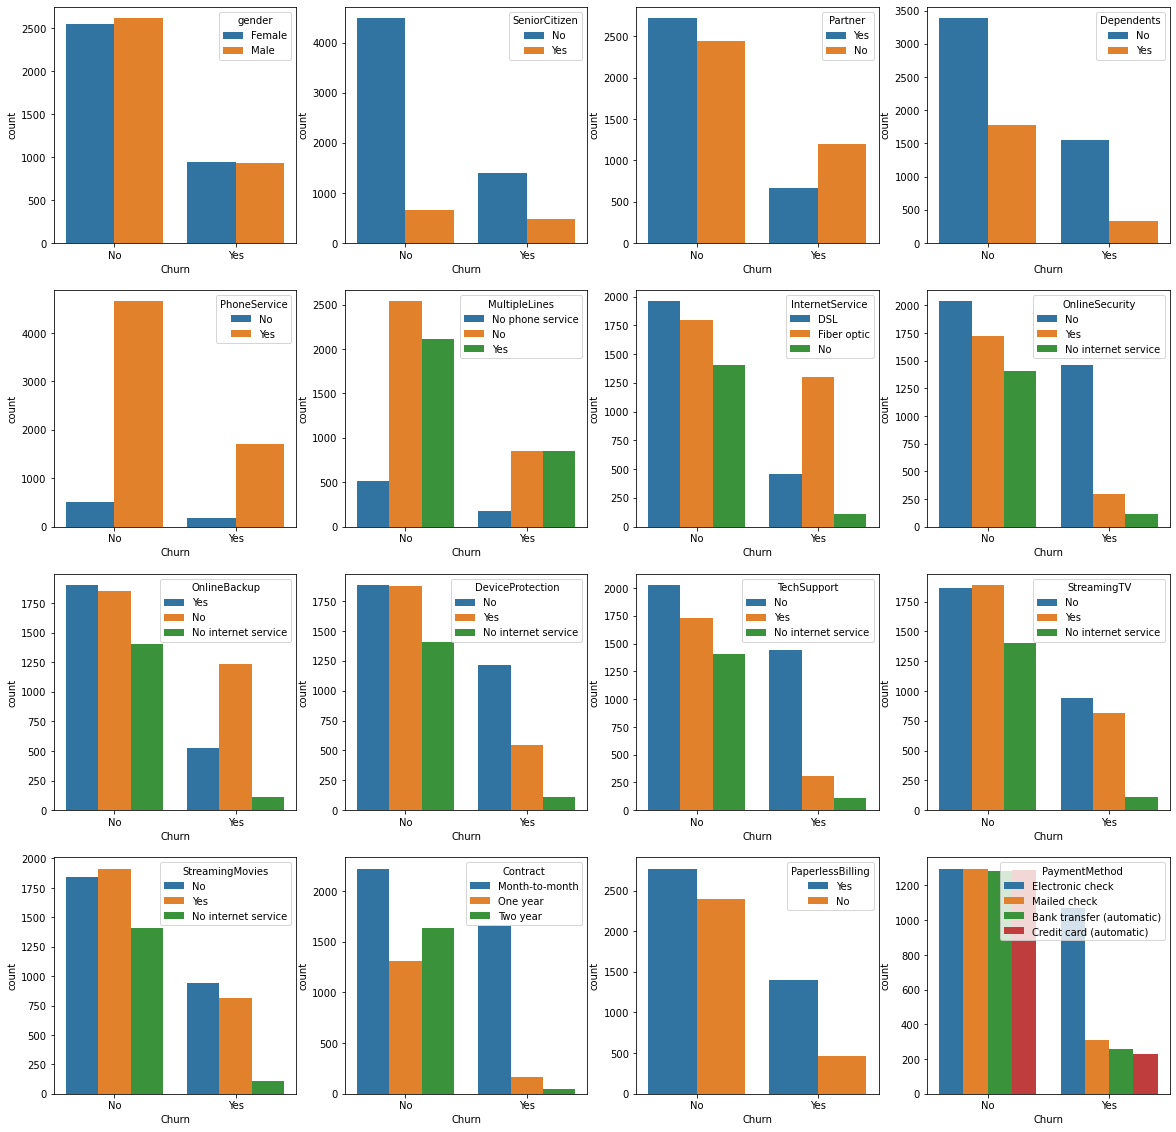

In [11]:
# Let's look at all the categorical variables and their impact on churn

# Removing churn variable for analysis
categorical_var = [i for i in df.columns if df[i].dtypes =='object']
catVars_noChurn = categorical_var[:-1]

fig ,ax = plt.subplots(4,4,figsize=(20,20))
for axi ,var in zip(ax.flat,catVars_noChurn):
    sns.countplot(x=df.Churn,hue=df[var],ax=axi)

#### Study the above charts and derive insights on how various factors are affecting the Churn. What are the main causes of churn?

#### Discuss with the trainer!

In [12]:
# Encoding the data - Before training the model, we need to make sure the data is in a form that the model can understand
# Use Label Encoder for all features with 2 classes
le = LabelEncoder()
for x in [i for i in df.columns if len(df[i].unique())==2]:
    print(x, df[x].unique())
    df[x]= le.fit_transform(df[x])

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


In [13]:
# Encode variables with more than 2 Classes
df = pd.get_dummies(df, columns= [i for i in df.columns if df[i].dtypes=='object'],drop_first=True)

In [14]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,8,1,1,99.65,820.50,1,...,0,0,1,0,1,0,0,0,1,0
6,1,0,0,1,22,1,1,89.10,1949.40,0,...,0,0,1,0,0,0,0,1,0,0
7,0,0,0,0,10,0,0,29.75,301.90,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,1,0,28,1,1,104.80,3046.05,1,...,1,0,1,0,1,0,0,0,1,0
9,1,0,0,1,62,1,0,56.15,3487.95,0,...,0,0,0,0,0,1,0,0,0,0


### Step 3: Split the data and train the models

In [15]:
X=df.drop('Churn',axis=1)
y=df['Churn']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = SEED)

#### Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Baseline model using Logistic Regression

In [17]:
logreg = LogisticRegression()

In [18]:
# K-fold cross validation using F1-score as scorer
scores = cross_val_score(logreg, 
                         X_train_scaled, 
                         y_train, 
                         cv=5, 
                         scoring='f1_macro')
print('F1 scores:', scores)
print('Mean & standard deviation: {:.2} {:.2f}'.format(scores.mean(), np.std(scores)))

F1 scores: [0.74272203 0.72238948 0.7276388  0.74021874 0.73351053]
Mean & standard deviation: 0.73 0.01


#### Model Selection - Train and evaluate multiple models

In [19]:
# Lists to keep track of model metrics
models = []
precision_list = []
recall_list = []
f1_score_list = []
training_acc_list = []
testing_acc_list = []

In [20]:
# Logistic Regression
logreg = LogisticRegression(n_jobs=-1)

In [21]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': np.logspace(-2, 2, 5)}

gs_logreg = GridSearchCV(logreg,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_logreg.fit(X_train_scaled, y_train)

C:\Users\USER\anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


Wall time: 12.4 s


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='f1_macro')

In [22]:
# Best model hyperparameters and score
print(gs_logreg.best_estimator_)
print(gs_logreg.best_params_)
print(gs_logreg.best_score_)

LogisticRegression(C=0.01, n_jobs=-1, penalty='none')
{'C': 0.01, 'penalty': 'none'}
0.7343120160025158


In [23]:
# Using best estimator found by GridSearchCV
logreg = gs_logreg.best_estimator_
logreg.fit(X_train_scaled, y_train)

C:\Users\USER\anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=0.01, n_jobs=-1, penalty='none')

In [24]:
y_pred = logreg.predict(X_test_scaled)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1311
           1       0.65      0.55      0.59       447

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.74      1758
weighted avg       0.80      0.81      0.80      1758



In [26]:
models.append('Logistic Regression')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, logreg.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

In [27]:
# Random Forest
rf = RandomForestClassifier(n_jobs=-1)

In [28]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'n_estimators': [100, 200, 300],
              'criterion': ['gini', 'entropy'],
              'max_depth': [5, 10, 25],
              'min_samples_split': [5, 10, 15]}

gs_rf = GridSearchCV(rf,
                    param_grid, 
                    cv=5,
                    scoring='f1_macro',
                    n_jobs=-1)
gs_rf.fit(X_train_scaled, y_train)

Wall time: 2min 15s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 25],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

In [29]:
# Best model hyperparameters and score
print(gs_rf.best_estimator_)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_jobs=-1)
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
0.7310383061842008


In [30]:
# Using best estimator found by GridSearchCV
rf = gs_rf.best_estimator_
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_jobs=-1)

In [31]:
y_pred = rf.predict(X_test_scaled)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1311
           1       0.66      0.49      0.56       447

    accuracy                           0.81      1758
   macro avg       0.75      0.70      0.72      1758
weighted avg       0.79      0.81      0.80      1758



In [33]:
models.append('Random Forest')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, rf.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

In [34]:
# Multi-Level Perceptron
mlp = MLPClassifier(solver='sgd')

In [35]:
%%time
# Hyperparameter tuning using K-fold cross validation
# ... via Grid Search method
param_grid = {'hidden_layer_sizes': [(3,3),
                                     (2),
                                     (3)], 
              'alpha': np.logspace(-4, -1, 4),
              'max_iter': [400, 450, 500, 550]}

gs_mlp = GridSearchCV(mlp,
                      param_grid, 
                      cv=5,
                      scoring='f1_macro',
                      n_jobs=-1)
gs_mlp.fit(X_train_scaled, y_train)

Wall time: 7min 21s


GridSearchCV(cv=5, estimator=MLPClassifier(solver='sgd'), n_jobs=-1,
             param_grid={'alpha': array([0.0001, 0.001 , 0.01  , 0.1   ]),
                         'hidden_layer_sizes': [(3, 3), 2, 3],
                         'max_iter': [400, 450, 500, 550]},
             scoring='f1_macro')

In [36]:
# Best model hyperparameters and score
print(gs_mlp.best_estimator_)
print(gs_mlp.best_params_)
print(gs_mlp.best_score_)

MLPClassifier(alpha=0.01, hidden_layer_sizes=2, max_iter=450, solver='sgd')
{'alpha': 0.01, 'hidden_layer_sizes': 2, 'max_iter': 450}
0.7314453982217745


In [37]:
# Using best estimator found by GridSearchCV
mlp = gs_mlp.best_estimator_
mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=2, max_iter=450, solver='sgd')

In [38]:
y_pred = mlp.predict(X_test_scaled)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1311
           1       0.64      0.55      0.59       447

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.73      1758
weighted avg       0.80      0.81      0.80      1758



In [40]:
models.append('Multilevel Perceptron')
precision_list.append(precision_score(y_test, y_pred, average='macro'))
recall_list.append(recall_score(y_test, y_pred, average='macro'))
f1_score_list.append(f1_score(y_test, y_pred, average='macro'))
training_acc_list.append(accuracy_score(y_train, mlp.predict(X_train_scaled)))
testing_acc_list.append(accuracy_score(y_test, y_pred))

In [41]:
model_metrics = pd.DataFrame(zip(models, training_acc_list, testing_acc_list,
                                 precision_list, recall_list, f1_score_list), 
                             columns=['Model', 'Training Acc', 'Testing Acc', 'Precision', 'Recall', 'F1 Score'])

In [42]:
model_metrics.sort_values(by='F1 Score', ascending=False)

,Model,Training Acc,Testing Acc,Precision,Recall,F1 Score
0,Logistic Regression,0.804323,0.810580,0.752865,0.723350,0.735417
2,Multilevel Perceptron,0.799393,0.807736,0.748296,0.721443,0.732574
1,Random Forest,0.854949,0.806030,0.749636,0.702607,0.719350


### Step 4: Predict and Evaluate with the best model

In [43]:
# Prediction by selected model
y_pred = logreg.predict(X_test_scaled)

In [44]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1311
           1       0.65      0.55      0.59       447

    accuracy                           0.81      1758
   macro avg       0.75      0.72      0.74      1758
weighted avg       0.80      0.81      0.80      1758



Text(33.0, 0.5, 'Predicted')

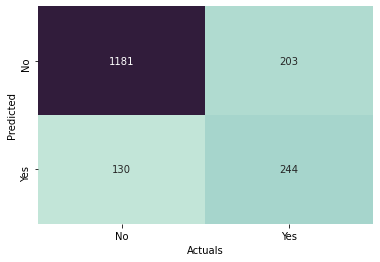

In [45]:
## Confusion Matrix

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat.T, annot=True, fmt='d', cbar=False, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True),
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('Actuals')
plt.ylabel('Predicted')

### Step 5: Get and plot features importances

In [46]:
# Creating the feature importances dataframe
feature_importance = np.array(rf.feature_importances_)
feature_names = np.array(X.columns)

feat_imp = pd.DataFrame({'feature_names':feature_names,'feature_importance':feature_importance})
feat_imp_sorted = feat_imp.sort_values('feature_importance', ascending=False)

<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

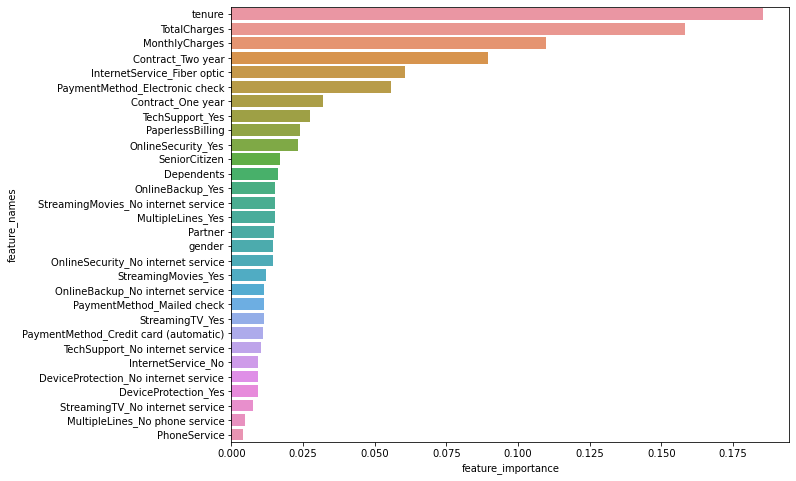

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(x=feat_imp_sorted['feature_importance'], y=feat_imp_sorted['feature_names'])